<a id='top'></a>

# CSCI 3202: Intro to AI - Fall 2020 Practicum 2

## Your name: Jeremy M. Hein

#### Collaborator's name (optional):


---
**Shortcuts:**  [Problem 1: Search](#p1) | [Problem 2: MDP](#p2) | [Problem 3: Q_Learn](#bot)

---

This practicum is due on Canvas by **10:00 PM on Saturday December 12**. Your solutions to theoretical questions should be done in Markdown/MathJax directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  

**Here are the rules:** 

1. All work, code and analysis, must be your own. 
2. You may use your course notes, posted lecture slides, textbooks, in-class notebooks, and homework solutions as resources.  You may also search online for answers to general knowledge questions like the form of a probability distributions or how to perform a particular operation in Python/Pandas. 
3. This is meant to be like a coding portion of your final exam. So, the instructional team will be much less helpful than we typically are with homework. For example, we will not check answers, help debug your code, and so on.
4. If something is left open-ended, it is because we want to see how you approach the kinds of problems you will encounter in the wild, where it will not always be clear what sort of tests/methods should be applied. Feel free to ask clarifying questions though.
5. You may **NOT** post to message boards or other online resources asking for help.  If you have a question for us, post it as a **PRIVATE** message on Piazza.  If we decide that the question is appropriate for the entire class, then we will add it to a Practicum clarifications thread. 
6. You may re-use your code or code given from in-class solutions (for e.g. Astar, MDP), but you **must cite** in comments any regions of code that were not created anew for this practicum.
7. You may collaborate with **exactly one** of your classmates.  You must each submit your own assignments and write your own code, and may only collaborate on ideas, psuedocode, etc.  If you choose to collaborate with another student in the class, list their name under yours above.
8. In short, **your work must be your own**. It really is that simple.

Violation of the above rules will result in an immediate academic sanction (*at the very least*, you will receive a 0 on this practicum or an F in the course, depending on severity), and a trip to the Honor Code Council.

**By submitting this assignment, you agree to abide by the rules given above.**

***

**NOTES**: 

- You may not use late days on the practicums nor can you drop your practicum grades.
- Some problems with code may be autograded.  If we provide a function API **do not** change it.  If we do not provide a function API then you're free to structure your code however you like. 
- Submit only this Jupyter notebook to Canvas.  Do not compress it using tar, rar, zip, etc. 
- This should go without saying, but... For any question that asks you to calculate something, you **must show all work to receive credit**. Sparse or nonexistent work will receive sparse or nonexistent credit.
***


In [18]:
import pandas as pd
import numpy as np
import random
import scipy.stats as stats
import matplotlib.pyplot as plt
from collections import defaultdict

# added packages
import heapq
from matplotlib import colors


Consider the map of the area to the west of the Engineering Center given below, with a fairly coarse Cartesian grid superimposed.

<img src="http://www.cs.colorado.edu/~tonyewong/home/resources/engineering_center_grid_zoom.png" style="width: 800px;"/>

The green square at $(x,y)=(1,15)$ is the starting location, and you would like to walk from there to the yellow square at $(25,9)$. The filled-in blue squares are obstacles, and you cannot walk through those locations.  You also cannot walk outside of this grid.

Legal moves in the North/South/East/West directions have a step cost of 1. Moves in the diagonal direction (for example, from $(1,15)$ to $(2,14)$) are allowed, but they have a step cost of $\sqrt{2}$. 


In [246]:
#Some tuples defining the wall and state locations, for your convenience

walls = [(1,y) for y in range(2,15)] + [(2,y) for y in range(3,14)] + [(3,y) for y in range(4,13)] + \
        [(4,y) for y in range(5,12)] + [(x,1) for x in range(5,24)] + [(10,y) for y in range(9,13)] + \
        [(x,y) for x in range(11,14) for y in range(9,15)] + [(14,y) for y in range(11,15)] + \
        [(x,y) for x in range(21,26) for y in range(11,17)] + \
        [(x,y) for x in [0,26] for y in range(0,18)] + [(x,y) for x in range(0,26) for y in [0,17]]
        
states = [(x,y) for x in range(1,26) for y in range(1,17)]

[Back to top](#top)
<a id='p1'></a>


---
## [40 pts] Part 1:  Route-finding
In this problem, our goal is to find the path from the green to yellow squares with the **shortest total path length**.

Of course, you can probably do this problem (and likely have to some degree, in your head) without a search algorithm. But that will hopefully provide a useful "sanity check" for your answer.

#### Part A
Write a function `adjacent_states(state)`:
* takes a single argument `state`, which is a tuple representing a valid state in this state space
* returns in some form the states reachable from `state` and the step costs. How exactly you do this is up to you.

Print to the screen the output for `adjacent_states((1,15))`.

In [24]:
# Your adjacency here

def adjacent_states(state):
    x = state[0] #x coordinate
    y = state[1] #y coordinate

    #dictionary for adjacent states
    #state tuples are keys, step cost is the value
    adjacents = {} 
    
    #loop through possible neighboring states
    for i in range(x-1,x+2):
        for j in range(y-1,y+2):
            
            #convert candidate states to tuple, and check if candidate is in states and not in walls
            candidate = (i,j)
            if candidate in states and candidate not in walls:
                
                #move directly east
                if i == x+1 and j == y:
                    adjacents[candidate] = 1
                    
                #move directly west
                elif i == x-1 and j == y:
                    adjacents[candidate] = 1
                    
                #move directly north
                elif j == y+1 and i == x:
                    adjacents[candidate] = 1
                    
                #move directly south
                elif j == y-1 and i == x:
                    adjacents[candidate] = 1
                    
                #all else diagonal move
                elif i == x+1 and j == y+1:
                    adjacents[candidate] = np.sqrt(2)
                elif i == x+1 and j == y-1:
                    adjacents[candidate] = np.sqrt(2)
                elif i == x-1 and j == y+1:
                    adjacents[candidate] = np.sqrt(2)
                elif i == x-1 and j == y-1:
                    adjacents[candidate] = np.sqrt(2)    
                
    return adjacents

In [25]:
#Test 1 - starting state
adj = adjacent_states((1,15))
print (adj)

{(1, 16): 1, (2, 14): 1.4142135623730951, (2, 15): 1, (2, 16): 1.4142135623730951}


In [26]:
#Test 2 - all neighbors are valid candidate moves
adj2 = adjacent_states((11,3))
print (adj2)

{(10, 2): 1.4142135623730951, (10, 3): 1, (10, 4): 1.4142135623730951, (11, 2): 1, (11, 4): 1, (12, 2): 1.4142135623730951, (12, 3): 1, (12, 4): 1.4142135623730951}


In [27]:
#Test 3 - top right corner
adj3 = adjacent_states((20,16))
print (adj3)

{(19, 15): 1.4142135623730951, (19, 16): 1, (20, 15): 1}


#### Part B
Three candidate heuristic functions might be:
1. `heuristic_cols(state, goal)` = number of columns between the argument `state` and the `goal`
1. `heuristic_rows(state, goal)` = number of rows between the argument `state` and the `goal`
1. `heuristic_eucl(state, goal)` = Euclidean distance between the argument `state` and the `goal`

Write a function `heuristic_max(state, goal)` that returns the maximum of all three of these heuristic functions for a given `state` and `goal`.

In [30]:
def heuristic_cols(state, goal):
    col_curr = state[0]
    col_goal = goal[0]
    return np.absolute(col_curr - col_goal)
  
def heuristic_rows(state, goal):
    row_curr = state[1]
    row_goal = goal[1]
    return np.absolute(row_curr - row_goal)

#Cite - pulled from Practicum 1 code to calculate Euclidean distance between to points
def heuristic_eucl(state, goal):
    x_value = (state[0]-goal[0])**2
    y_value = (state[1]-goal[1])**2
    distance = np.sqrt(x_value + y_value)
    return distance

def heuristic_max(state, goal):
    col = heuristic_cols(state,goal)
    row = heuristic_rows(state,goal)
    eucl = heuristic_eucl(state,goal)
    return max(col,row,eucl)

In [31]:
#Test - start and goal from problem

#expect 24
c = heuristic_cols((1,15),(25,9))

#expect 6
r = heuristic_rows((1,15),(25,9))

#expect 24.7386
e = heuristic_eucl((1,15),(25,9))

#expect eucl
m = heuristic_max((1,15),(25,9))

print ("Column distance is: ", c)
print ("Row distance is: ", r)
print ("Euclidean distance is: ", e)
print ("Maximum heuristic is: ", m)

Column distance is:  24
Row distance is:  6
Euclidean distance is:  24.73863375370596
Maximum heuristic is:  24.73863375370596


#### Part C
Is the Manhattan distance an admissible heuristic function for this problem?  Explain why or why not.

No, Manhattan distance caclculates the distance between two points measured along axes at right angles.  Since a diagonal move is valid in this problem, the Manhattan distance would overestimate the actual distance, causing our heuristic to be inconsistent and ultimately leading to a sub-optimal solution.

#### Part D
Use A\* search and the `heuristic_max` heuristic to find the shortest path from the initial state at $(1,15)$ to the goal state at $(25,9)$. Your search **should not** build up the entire state space graph in memory. Instead, use the `adjacent_states` function from Part A, similarly to the 8-tile problem from Homework 3. 

In [167]:
def path(previous, s): 
    '''
    `previous` is a dictionary chaining together the predecessor state that led to each state
    `s` will be None for the initial state
    otherwise, start from the last state `s` and recursively trace `previous` back to the initial state,
    constructing a list of states visited as we go
    '''
    if s is None:
        return []
    else:
        return path(previous, previous[s])+[s]

#this code updated from 8-Tile Problem.ipynb for use in this problem
def pathcost(path):
    '''
    add up the step costs along a path, which is assumed to be a list output from the `path` function above
    '''
    cost = 0
    for s in range(len(path)):
        if s == 0:
            cost = cost
        else:
            p = path[s-1]
            adjacent = adjacent_states(p)
            cost += adjacent[path[s]]
    return cost

In [226]:
#Cite: Code for Frontier_PQ class and a_star seach was copied from 8-Tile Problem.ipynb provided by instructors
#Only minor modifications to path cost, as not every step is 1 unit

class Frontier_PQ:
    ''' frontier class for uniform search, ordered by path cost '''
    
    def __init__(self, start, cost):
        self.states = {}
        self.q = []
        self.add(start, cost)
        
    def add(self, state, cost):
        ''' push the new state and cost to get there onto the heap'''
        heapq.heappush(self.q, (cost, state))
        self.states[state] = cost

    def pop(self):
        (cost, state) = heapq.heappop(self.q)  # get cost of getting to explored state
        self.states.pop(state)    # and remove from frontier
        return (cost, state)

    def replace(self, state, cost):
        ''' found a cheaper route to `state`, replacing old cost with new `cost` '''
        self.states[state] = cost
        for i, (oldcost, oldstate) in enumerate(self.q):
            if oldstate==state and oldcost > cost:
                self.q[i] = (cost, state)
                heapq._siftdown(self.q, 0, i) # now i is posisbly out of order; restore
        return

# Solution:

def astar_search(start, goal, heuristic, return_cost=False, return_nexp=False):
    '''A* search from `start` to `goal`
    start = initial state
    goal = goal state
    heuristic = function for estimated cost to goal (function name)
    return_cost = logical (True/False) for whether or not to return the total path cost
    return_nexp = logical (True/False) for whether or not to return the number of nodes explored
    '''

    frontier = Frontier_PQ(start, 0)
    previous = {start : None}
    explored = {}
    n_exp = 0
    
    while frontier:
        
        #get next move and increment nodes explored
        s = frontier.pop()
        n_exp += 1
        
        #if state is goal, return
        if s[1] == goal:
            if return_cost: return (path(previous, s[1]), s[0], n_exp) if return_nexp else (path(previous, s[1]), s[0])
            return path(previous, s[1])
        
        #this code updated from 8-Tile Problem.ipynb
        #get the current path and current path cost
        curr_path = path(previous, s[1])
        curr_path_cost = pathcost(curr_path)
        
        #this code updated from 8-Tile Problem.ipynb
        #explored up to state is the current path cost
        explored[s[1]] = curr_path_cost   
        adjacent = adjacent_states(np.asarray(s[1]))
        
        #loop through adjacent states
        for s2 in adjacent:
            
            #this code updated from 8-Tile Problem.ipynb
            #new cost is cost up to current state, plus the step to adjacent state, plus heuristic
            newcost = explored[s[1]] + adjacent[s2] + heuristic(np.asarray(s2), np.asarray(goal))
            
            #update frontier
            if (s2 not in explored) and (s2 not in frontier.states):
                frontier.add(s2, newcost)
                previous[s2] = s[1]
            elif (s2 in frontier.states) and (frontier.states[s2] > newcost):
                frontier.replace(s2, newcost)
                previous[s2] = s[1]

In [232]:
#small test
#Expected path: [(1, 15), (2, 14), (3, 13), (4, 12)]
#Expected cost: ~4.242
my_test = astar_search((1,15), (4,12), heuristic=heuristic_max, return_cost=True, return_nexp=False)

print ("Path is:", my_test[0])
print ("Cost is:", my_test[1])

Path is: [(1, 15), (2, 14), (3, 13), (4, 12)]
Cost is: 4.242640687119286


In [256]:
a_star = astar_search((1,15), (25,9), heuristic=heuristic_max, return_cost=True, return_nexp=False)
print ("Path is:", a_star[0])
print ("Cost is:", a_star[1])

Path is: [(1, 15), (2, 15), (3, 15), (4, 15), (5, 15), (6, 15), (7, 15), (8, 15), (9, 15), (10, 15), (11, 15), (12, 15), (13, 15), (14, 15), (15, 14), (16, 13), (17, 13), (18, 12), (19, 12), (20, 11), (21, 10), (22, 10), (23, 10), (24, 9), (25, 9)]
Cost is: 26.485281374238575


In [231]:
#checking path costs

test = [(1, 15), (2, 15), (3, 15), (4, 15), (5, 15), (6, 15), (7, 15), (8, 15), (9, 15), (10, 15), (11, 15), (12, 15), (13, 15), (14, 15), (15,14),(16,13),(17,12),(18,11),(19,10),(20,9),(21,9),(22,9),(23,9),(24,9),(25,9)]
cost = pathcost(test)

test2 = [(1, 15), (2, 15), (3, 15), (4, 15), (5, 15), (6, 15), (7, 15), (8, 15), (9, 15), (10, 15), (11, 15), (12, 15), (13, 15), (14, 15), (15, 15), (16, 15), (17, 14), (18, 13), (19, 12), (20, 11), (21, 10), (22, 10), (23, 10), (24, 10), (25, 9)]
cost2 = pathcost(test2)

test3 = [(1, 15), (2, 15), (3, 15), (4, 15), (5, 15), (6, 15), (7, 15), (8, 15), (9, 15), (10, 15), (11, 15), (12, 15), (13, 15), (14, 15)]
cost3 = pathcost(test3)
print(cost, cost2, cost3)

26.485281374238575 26.485281374238575 13


#### Part E
Make a figure depicting the optimal route from the initial state to the goal, similarly to how you depicted the maze solution in Homework 2.

In [253]:
#Cite: maze set up and code from HW2, adjusted to fit current problem
maze = np.array([[0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0], 
                 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 
                 [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 
                 [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 
                 [1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                 [1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 
                 [1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 
                 [1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 
                 [1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 
                 [1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 
                 [1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1], 
                 [1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1], 
                 [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1], 
                 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1], 
                 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1], 
                 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1]])

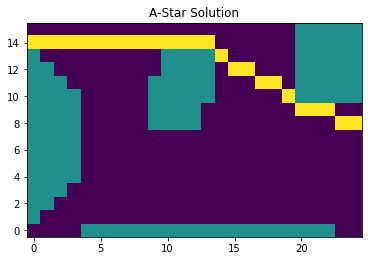

In [261]:
def plot_maze(maze,path, title):
    for i in range (26):
        for j in range(17):
            l =[i,j]
            tupe = tuple(l)
            if tupe in path:
                maze[j-1][i-1] = 2
    
    cmap = plt.cm.gray
    plt.imshow(maze,  origin='lower')
    plt.title(title)
    plt.show()
    
plot_maze(maze, a_star[0], 'A-Star Solution')

[Back to top](#top)
<a id='p2'></a>


---
## [40 pts] Part 2:  States and Values

Winter has come, and now the area west of Engineering is icy and slippery.  As a result, there's a risk that we don't end up in the tile that we intend to move to!  In particular, if we have $k$ available actions in state $n$, the probably that we move to the state $s'$ we intend to is 75\%, and the remaining 0.25 probability is spread equally likely across all of the other adjacent (N/S/E/W/NW/NE/SE/SW) non-wall states.

In this problem, our goal is to create a policy for an agent walking in the given space west of Engineering.  Again, the goal of the agent is to navigate from start to finish, but now we want a policy for each and every location on the map.

This time, however, we're going to add the same type of randomness that our process in homework 4 had.

Because the state space is fully observable, we should be able to implement this as a Markov Decision process.


#### Part A:

Write the necessary functions to create *either* a **value iteration** or **policy iteration** scheme to solve for the MDP.  If you wish to follow the schema for homework 4, you may want to create an `MDP` class, with methods:

- `actions`, given by the valid successor states $s'$ from all actions $a$ in state $s$ in your adjacent_states from part 1.
- `rewards`, given by a significant positive reward for the goal state (e.g. 10) and a small negative reward for spending a long time in the system (e.g. non-wall reward of -0.01).
- `result`, which returns the successor state $s'$ of an *actual* movement $a$ from state $s$.
- `transition`, which returns the probability of an actual successor $s'$ given action $a$ from state $s$ using the 75\%-25% split above.


In [290]:
#Cite: code from HW4 / in-class notebood on MDP
#added walls as input parameter
#added additional actions/results for NE, NW, SE, SW
#re-did transition function

class MDP:
    def __init__(self, nrow, ncol, terminal, walls, default_reward, discount):
        '''Create/store the following attributes:
        states -- list of all the states (x,y) tuples
        terminal_states -- is a dictionary with terminal state keys, and rewards as values
        default_reward -- is the reward for being in any non-terminal state
        df -- discount factor
        ... and anything else you decide will be useful!
        '''
        
        self.nrow = nrow
        self.ncol = ncol
        self.states = [(x,y) for x in range(1,ncol+1) for y in range(1,nrow+1)]
        self.terminal_states = terminal
        self.walls = walls
        self.default_reward = default_reward
        self.df = discount        
        

    def actions(self, state):
        '''Return a list of available actions from the given state.
        [None] are the actions available from a terminal state.
        '''
        
        x = state[0] #x coordinate
        y = state[1] #y coordinate
        actions = []
        if state in self.walls:
            return [None]
        else:


            #loop through possible neighboring states
            for i in range(x-1,x+2):
                for j in range(y-1,y+2):
                    candidate = (i,j)
                    if candidate in self.states and candidate not in self.walls:
                        if state in self.terminal_states:
                            return [None]

                        #move directly east
                        if i == x+1 and j == y:
                            actions.append('E')

                        #move directly west
                        elif i == x-1 and j == y:
                            actions.append('W')

                        #move directly north
                        elif j == y+1 and i == x:
                            actions.append('N')

                        #move directly south
                        elif j == y-1 and i == x:
                            actions.append('S')

                        #move north east
                        elif i == x+1 and j == y+1:
                            actions.append('NE')

                        #move sout east
                        elif i == x+1 and j == y-1:
                            actions.append('SE')

                        #move north west
                        elif i == x-1 and j == y+1:
                            actions.append('NW')

                        #move south west
                        elif i == x-1 and j == y-1:
                            actions.append('SW')    

        return actions
        
        
    def reward(self, state):
        '''Return the reward for being in the given state'''
        
        return self.terminal_states[state] if state in self.terminal_states.keys() else self.default_reward
        
        
    def result(self, state, action):
        '''Return the resulting state (as a tuple) from doing the given
        action in the given state, without uncertainty. Uncertainty
        is incorporated into the transition method.
        state -- a tuple representing the current state
        action -- one of N, S, E or W, as a string
        '''
    
        assert action in self.actions(state), 'Error: action needs to be available in that state'
        assert state in self.states, 'Error: invalid state'
        
        x = state[0]
        y = state[1]
        
        if action == 'N':
            return (x,y+1)
            
        elif action == 'S':
            return (x,y-1)
            
        elif action == 'E':
            return (x+1,y)
            
        elif action == 'W':
            return (x-1,y)
        
        elif action == 'NE':
            return (x+1,y+1)
        
        elif action == 'SE':
            return (x+1,y-1)
        
        elif action == 'NW':
            return (x-1,y+1)
        
        elif action == 'SW':
            return (x-1,y-1)
                        
                
    def transition(self, state, action):
        '''Return the probabilities and subsequent states associated
        with taking the given action from the given state. Can be done
        however you want, so that it works with your value/policy iteration.
        '''
        if action is None:
            return [(0, state)]
        else:
            
            my_actions = self.actions(state)
            p_action = 0.75
            p_else = 0.25/(len(my_actions)-1)
            x = state[0]
            y = state[1]
            s_prime = self.result(state,action)
            transitions = []
        
            transitions.append((p_action,s_prime))
            for a in my_actions:
                if a != action:
                    s = self.result(state,a)
                    transitions.append((p_else,s))
                
        return transitions

In [419]:
#small tests: get actions from start (1,15)
#get transtions from (1,15) if action is SE
nrow = 16
ncol = 25
default_reward = -0.01
discount = 0.99
terminal = {(25,9):20}
mdp = MDP(nrow, ncol, terminal, walls, default_reward, discount)
actions = mdp.actions((1,15))
print(actions)
t = mdp.transition((1,15),'SE')
print(t)

['N', 'SE', 'E', 'NE']
[(0.75, (2, 14)), (0.08333333333333333, (1, 16)), (0.08333333333333333, (2, 15)), (0.08333333333333333, (2, 16))]



#### Part B:

Using the MDP in part 2A, implement value iteration **or** policy iteration to calculate the utilities for each state. Also implement a function that takes as arguments an MDP object and a dictionary of state-utility pairs (key-value) and returns a dictionary for the optimal policy. The optimal policy dictionary should have state tuples as keys and the optimal move (None or any of the 8 directions) as values.

In [294]:
#Cite: Code is directly from HW4, which in turn was from the in-class NB on MDP's

def value_iteration(mdp, tol=1e-3):
    gamma = mdp.df #discount factor for MDP
    
    utility_new = {s : 0 for s in mdp.states} #initilize utility for all states
    
    while True:
        
        utility_old = utility_new.copy()
        max_change = 0
        
        for s in mdp.states:
            
            # for each available action, what next states
            # are possible, and their probabilities?

            next_states = [mdp.transition(s, a) for a in mdp.actions(s)]
            best_utility = -999
            for i in range(len(next_states)): 
                
                newsum = 0
                for j in range(len(next_states[i])):
                    prob_sprime = next_states[i][j][0]
                    utility = utility_old[next_states[i][j][1]]
                    newsum = newsum + prob_sprime * utility
                    best_utility = max(best_utility, newsum)
                    if len(next_states)==1:
                        best_utility = newsum
                        
            # new utility of s = reward(s) + discounted max expected utility
            utility_new[s] = mdp.reward(s) + gamma*best_utility
            # update maximum change in utilities, if needed
            max_change = max(max_change, abs(utility_new[s]-utility_old[s]))

        if (gamma == 1 and max_change < tol) or max_change < tol*(1-gamma)/gamma:
            break
    return utility_new
    

def find_policy(mdp, utility):
    
    # initialize the policy for each state
    policy = {s : None for s in mdp.states}

    # loop over states to find the action that maximizes expected utility
    for s in mdp.states:

        # initialize the best utility to something very bad, so we can improve it
        best_utility = (-999, None)

        # loop over actions, find which gives the highest expected utility
        for a in mdp.actions(s):

            # calculate the expected utility of action a from state s
            newsum = sum([p*utility[s2] for p, s2 in mdp.transition(s,a)])

            # if this action has higher expected utility than the current best,
            # replace the best (utility, action) tuple with this one
            if newsum > best_utility[0]:
                best_utility = (newsum, a)

        # now we have the action (second element) that leads
        # to the highest expected utility (first element)
        policy[s] = best_utility[1]
    return policy

    
value_dict = value_iteration(mdp)
policy_dict = find_policy(mdp,value_dict)
policy_dict

{(1, 1): 'NE',
 (1, 2): None,
 (1, 3): None,
 (1, 4): None,
 (1, 5): None,
 (1, 6): None,
 (1, 7): None,
 (1, 8): None,
 (1, 9): None,
 (1, 10): None,
 (1, 11): None,
 (1, 12): None,
 (1, 13): None,
 (1, 14): None,
 (1, 15): 'SE',
 (1, 16): 'SE',
 (2, 1): 'NE',
 (2, 2): 'NE',
 (2, 3): None,
 (2, 4): None,
 (2, 5): None,
 (2, 6): None,
 (2, 7): None,
 (2, 8): None,
 (2, 9): None,
 (2, 10): None,
 (2, 11): None,
 (2, 12): None,
 (2, 13): None,
 (2, 14): 'SE',
 (2, 15): 'SE',
 (2, 16): 'SE',
 (3, 1): 'NE',
 (3, 2): 'NE',
 (3, 3): 'NE',
 (3, 4): None,
 (3, 5): None,
 (3, 6): None,
 (3, 7): None,
 (3, 8): None,
 (3, 9): None,
 (3, 10): None,
 (3, 11): None,
 (3, 12): None,
 (3, 13): 'SE',
 (3, 14): 'SE',
 (3, 15): 'SE',
 (3, 16): 'SE',
 (4, 1): 'NE',
 (4, 2): 'NE',
 (4, 3): 'NE',
 (4, 4): 'NE',
 (4, 5): None,
 (4, 6): None,
 (4, 7): None,
 (4, 8): None,
 (4, 9): None,
 (4, 10): None,
 (4, 11): None,
 (4, 12): 'SE',
 (4, 13): 'SE',
 (4, 14): 'SE',
 (4, 15): 'SE',
 (4, 16): 'SE',
 (5, 1): Non


#### Part C:

Sanity check your answers in part B by listing which state has the *lowest* estimated utility (should be far from the goal!) and which states have the 3 *highest* estimated utilities.

In [295]:
value_dict

{(1, 1): 14.140022379905675,
 (1, 2): -0.01,
 (1, 3): -0.01,
 (1, 4): -0.01,
 (1, 5): -0.01,
 (1, 6): -0.01,
 (1, 7): -0.01,
 (1, 8): -0.01,
 (1, 9): -0.01,
 (1, 10): -0.01,
 (1, 11): -0.01,
 (1, 12): -0.01,
 (1, 13): -0.01,
 (1, 14): -0.01,
 (1, 15): 14.07710860113402,
 (1, 16): 14.035449384354882,
 (2, 1): 14.267615147111217,
 (2, 2): 14.301401101822732,
 (2, 3): -0.01,
 (2, 4): -0.01,
 (2, 5): -0.01,
 (2, 6): -0.01,
 (2, 7): -0.01,
 (2, 8): -0.01,
 (2, 9): -0.01,
 (2, 10): -0.01,
 (2, 11): -0.01,
 (2, 12): -0.01,
 (2, 13): -0.01,
 (2, 14): 14.26032427166859,
 (2, 15): 14.209399425518825,
 (2, 16): 14.165115030860154,
 (3, 1): 14.431796785360758,
 (3, 2): 14.465422856347379,
 (3, 3): 14.499211894108988,
 (3, 4): -0.01,
 (3, 5): -0.01,
 (3, 6): -0.01,
 (3, 7): -0.01,
 (3, 8): -0.01,
 (3, 9): -0.01,
 (3, 10): -0.01,
 (3, 11): -0.01,
 (3, 12): -0.01,
 (3, 13): 14.463505941158898,
 (3, 14): 14.414363203923896,
 (3, 15): 14.368601567176,
 (3, 16): 14.3476525310935,
 (4, 1): 14.61309006885

Referencing value_dict above:

State with lowest estimated utility: (1,16) 
Also close are similiary far away states (1,1), (1,15), etc.

Three highest states: (25,10), (24,9), (24,10)
Likewise, all states surrounding terminal state (25,9) are very close in expected utility


#### Part D:

As in part 1E, make a figure.  This time, depict the optimal policy at each location.  Your choice of visualization is up to you, but I would *recommend* taking a plot similar to the maze plot in Part 1E above (or HW 2) and plotting some choice of arrows/symbols/colors corresponding to the appropriate action in each square.

In [301]:
#Cite: maze set up and code from HW2, adjusted to fit current problem
maze2 = np.array([[0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0], 
                 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 
                 [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 
                 [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 
                 [1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                 [1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 
                 [1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 
                 [1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 
                 [1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 
                 [1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 
                 [1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1], 
                 [1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1], 
                 [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1], 
                 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1], 
                 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1], 
                 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1]])

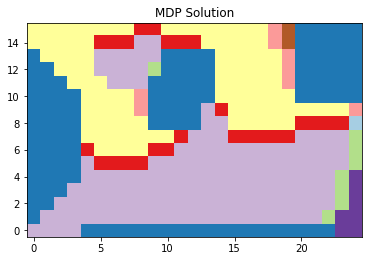

In [318]:
def plot_maze2(maze,path, title):
    for i in range (26):
        for j in range(17):
            l =[i,j]
            tupe = tuple(l)
            if tupe in path:
                action = policy_dict[tupe] #get the action from policy dictionary
                if action == 'N':
                    maze[j-1][i-1] = 2
                elif action == 'S':
                    maze[j-1][i-1] = 3
                elif action == 'E':
                    maze[j-1][i-1] = 4
                elif action == 'W':
                    maze[j-1][i-1] = 5
                elif action == 'NE':
                    maze[j-1][i-1] = 6
                elif action == 'NW':
                    maze[j-1][i-1] = 7
                elif action == 'SE':
                    maze[j-1][i-1] = 8
                elif action == 'SW':
                    maze[j-1][i-1] = 9
                
    
    cmap = plt.cm.Set3
    plt.imshow(maze,  origin='lower', cmap='Paired')
    plt.title(title)
    plt.show()
    
plot_maze2(maze2,mdp.states, 'MDP Solution')

**NOTES TO MDP MAP:**
Dark Blue = wall (no movemement)

Yellow = South East

Brown = South West

Light Purple = North East

Dark Purple = North West

Green = North

Red = East

Pink = South


[Back to top](#top)
<a id='p3'></a>


---
## [20 pts] Part 3:  The great unknown

It's nearly winter solstice, and the area west of Engineering is still icy and slippery.  

As a result, there's still a risk that we don't end up in the tile that we intend to move to!  Unfortunately, for this problem we *don't know* what that risk is, and it isn't the same everywhere.  As in Problem 2, our goal is to create a policy for an agent walking in the given space west of Engineering.  Again, the goal of the agent is to navigate from start to finish, but now we want a policy for each and every location on the map

Suppose there exists some function $f$ that measures the *footing* of state $s$.  Then if we choose to take the action "move towards state $s'$" from state $n$, the probability that we *actually arrive* in the state $s'$ we intend to is $f(s)$.  As before, the remaining $1-f(s)$ probability is spread equally likely across all of the other adjacent (N/S/E/W/NW/NE/SE/SW) non-wall states to $s$.

Because our agent can't fully observe the transitions, it's going to have to pick actions and estimate their utilities from learning.  Let's use Q-learning!

#### Part A:

Run the following code to provide a function for and a map of the footing function $f$.


Text(0.5, 1.0, 'Footing')

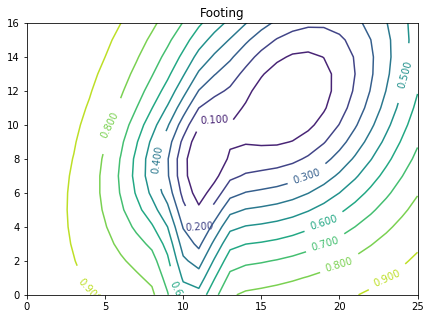

In [387]:
###YOU MAY IGNORE THIS CELL, BUT MUST RUN IT TO GENERATE F
random.seed(30)
x = np.linspace(0,25,26)
y = np.linspace(0,25,26)
X,Y = np.meshgrid(x,y)
f1 = np.zeros(X.shape)
f2 = np.zeros(X.shape)
f3 = np.zeros(X.shape)
f4 = np.zeros(X.shape)

mu1, mu2, mu3, mu4=[17,12],[17,11],[11,8],[11,6]
covar1, covar2, covar3, covar4= [[16,8],[8,16]],[[12,.5],[.5,12]],[[4,.8],[.8,4]],[[.8,12],[.8,12]]
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        f1[i,j] = 6*stats.multivariate_normal.pdf(x=(X[i,j],Y[i,j]), mean=mu1, cov=covar1)
        f2[i,j] = 3*stats.multivariate_normal.pdf(x=(X[i,j],Y[i,j]), mean=mu2, cov=covar2)
        f3[i,j] = stats.multivariate_normal.pdf(x=(X[i,j],Y[i,j]), mean=mu3, cov=covar3)
        f4[i,j] = 1*stats.multivariate_normal.pdf(x=(X[i,j],Y[i,j]), mean=mu4, cov=covar4)
        
f =f1+f2+f3+f4    
f=1-(f/np.max(f))**(1/3)

#PLOTTING:
fig, ax = plt.subplots(1,1, figsize=(7,5))
my_levels = np.linspace(0, 1, 11)
labels = [str(lv) for lv in my_levels]
cp = ax.contour(X, Y, f, levels=my_levels)
plt.clabel(cp, inline=1, fontsize=10)
ax.set(xlim=(0, 25), ylim=(0, 16))
plt.title('Footing')


In [388]:
# You can access f directly using indices if you use the TRANPOSE of the coordinates of each point
#which this footing function does
def footing(x,y):
    return f[y,x]

print("It's icy at (12,8), with almost no footing:", footing(12,8))
print("It's better at (8,12):", footing(8,12))

It's icy at (12,8), with almost no footing: 0.0344326686812465
It's better at (8,12): 0.6595232752211774


#### Part B:

We're going to implement Q-learning instead of an MDP.

You will probably want to create a dictionary of the form discussed at the end of the in-class notebook for Q-learning, where each valid tuple is the first key and each valid move from that location is the second key.  You then should have the estimated utilities of each action saved in the resulting dictionary.  You may include other information if desired, but nothing else should be absolutely necessary.

After initialization, print the elements of the dictionary corresponding to the (4,4) location.  Note that there should be 7 subdictionaries for the 6 possible neighbors and the `None` action, and within each action the initial Q-value should be zero.

In [423]:
#create a Q, initialize all the Q-utilities as 0
Q = {}
for state in states:
    if state not in walls:
        Q[state] = {}
        candidates = mdp.actions(state) #use mdp class to get possible actions from state
        for c in candidates:
            Q[state][c] = (0,0) #tuple stores (utility, number of times visited)
print(Q[(4,4)])
print(Q[(1,1)])
print(Q[(20,10)])
print(Q[(22,10)])

{'SW': (0, 0), 'S': (0, 0), 'SE': (0, 0), 'E': (0, 0), 'NE': (0, 0)}
{'E': (0, 0), 'NE': (0, 0)}
{'SW': (0, 0), 'W': (0, 0), 'NW': (0, 0), 'S': (0, 0), 'N': (0, 0), 'SE': (0, 0), 'E': (0, 0)}
{'SW': (0, 0), 'W': (0, 0), 'S': (0, 0), 'SE': (0, 0), 'E': (0, 0)}


Note directions from Part 2:

"Winter has come, and now the area west of Engineering is icy and slippery. As a result, there's a risk that we don't end up in the tile that we intend to move to! In particular, if we have  𝑘  available actions in state  𝑛 , the probably that we move to the state  𝑠′  we intend to is 75%, and the remaining 0.25 probability is spread equally likely across all of the other adjacent (N/S/E/W/NW/NE/SE/SW) non-wall states."

According to the directions, the 25% probability that we don't move to state s' is split amond other possible adjacent states.  It does not include the possibility for a "none" action.  Therefore, in the directions above, None should not be an option.  There are also only 5 valid moves from state (4,4).

Also note that I implemented Part 2 in this fashion, as per the directions.

#### Part C:

Use the given `footing` function to modify your `transitions` from the MDP so the probabilities of result given action now flow from the icy model above.

Perform at least 1000 training epochs, where each starts at a *random* location from the valid states (this can help if find the goal state faster!).

For each epoch, take *at most* 100 actions, or until the goal is reached.  You may choose these actions by any schema you desire, but I recommend the $\varepsilon$-greedy agent that chooses the "best available" action 80% of the time and explores the other 20%. 

Show graphs depicting the actual paths taken for the last 2 of the training epochs.

In [424]:
def q_transition(state, action, goal):
    if action is None:
        return [(0, state)]
    else:
        #get list of potential actions
        my_actions = list(Q[state].keys())
        
        #get coordinates of s'
        
        s_prime = mdp.result(state,action)
        
        #get x,y values
        x = s_prime[0]
        y = s_prime[1]
        
        #p_action = footing
        p_action = footing(x,y)
        
        #p_else = 1 - p
        p_else = (1 - p_action)/(len(my_actions)-1)
        
        transitions = []
        transitions.append((p_action,s_prime,action))
        
        for a in my_actions:
            if a != action:
                s = mdp.result(state,a)
                transitions.append((p_else,s,a))

    return transitions

In [425]:
#helper function to return the next move
def get_action(state,goal):
    if state == goal:
        return None
    else:
        my_actions = list(Q[state].keys())

        #get action with best utility from state
        for a in my_actions:
            best_util = -1000
            best_action = ""
            if Q[state][a][0] > best_util:
                best_action = a
                best_util = Q[state][a][0]

        r = random.random()
        if r <= 0.8:
            return best_action
        else:
            my_actions.remove(best_action)
            return random.choice(my_actions)

def max_value(state):
    my_actions = mdp.actions(state)
    
    #get action with best utility from state
    for a in my_actions:
        best_util = -1000
        best_action = ""
        if Q[state][a][0] > best_util:
            best_action = a
            best_util = Q[state][a][0]
    return best_util
     

#helper function to calculate q
def calc_q(state,action,gamma,goal):
    #get transtions
    transitions = q_transition(state,action,goal)
    
    #get probability of moving to s_prime
    p_action = transitions[0][0]
    
    #generate random number between 0 and 1
    r = random.random()
    new_a = action

    #if r > p_action, we take a random action instead
    if r > p_action and mdp.result(state,action) != goal:
        del transitions[0]
        x = random.choice(transitions)
        s_prime = x[1]
        new_a = x[2]
    else:
        s_prime = mdp.result(state,action)
    
    
    if Q[state][new_a][1] == 0:
        alpha = 1/3
    else:
        alpha = 1/Q[state][new_a][1]
    
    QD = mdp.reward(s_prime) + gamma * max_value(s_prime) - Q[state][new_a][0]
    
    new_q = Q[state][new_a][0] + alpha * QD
    new_n = Q[state][new_a][1] + 1
    new_dict = {new_a:(new_q,new_n)}
    Q[state].update(new_dict)
    return s_prime
    
    
# Initialize parameters
gamma = mdp.df # Discount factor 
max_moves = 100
valid_states = list(Q.keys())
goal = (25,9)

#complete 1000 training episodes
for i in range(2000):
    
    # Pick up a state randomly
    current_state = random.choice(valid_states)
    
    #track number of moves
    moves = 0
    #while we have not hit number of moves, or hit the goal state
    while moves < max_moves:
        if current_state == goal:
            break
        else:

            #get the next move
            next_action = get_action(current_state, goal)
            next_state = calc_q(current_state,next_action,gamma,goal)
            current_state = next_state
            moves += 1

print(Q)

{(1, 1): {'E': (-0.061505775938285136, 7), 'NE': (-0.04269706901339022, 4)}, (1, 15): {'N': (-0.003333333333333333, 1), 'SE': (-0.003333333333333333, 1), 'E': (0, 0), 'NE': (-0.05682375186133589, 9)}, (1, 16): {'S': (-0.016106178434877005, 1), 'SE': (0, 0), 'E': (-0.06101142644325854, 4)}, (2, 1): {'W': (-0.04617824081178071, 4), 'N': (-0.05532094831789208, 3), 'E': (-0.020598311386637484, 1), 'NE': (-0.05622496020097189, 10)}, (2, 2): {'SW': (-0.015392746937260235, 1), 'S': (0, 0), 'SE': (-0.02088072502539998, 1), 'E': (-0.017455062834406246, 1), 'NE': (-0.04898530272514633, 14)}, (2, 14): {'NW': (-0.016106178434877005, 1), 'N': (0, 0), 'SE': (0, 0), 'E': (-0.025916729689247145, 1), 'NE': (-0.08225035339478276, 2)}, (2, 15): {'W': (0, 0), 'NW': (0, 0), 'S': (0, 0), 'N': (0, 0), 'SE': (0, 0), 'E': (0, 0), 'NE': (-0.060537980572886625, 8)}, (2, 16): {'SW': (-0.05519032847161351, 3), 'W': (-0.007959734316779115, 1), 'S': (0, 0), 'SE': (0, 0), 'E': (-0.06461307698049887, 14)}, (3, 1): {'W

In [426]:
def find_policy_q(q):
    
    # initialize the policy for each state
    policy = {s : None for s in mdp.states}

    # loop over states to find the action that maximizes expected utility
    for key in q:
        my_actions = list(Q[key].keys())

        #get action with best utility from state
        for a in my_actions:
            best_util = -1000
            best_action = ""
            if Q[key][a][0] > best_util:
                best_action = a
                best_util = Q[key][a][0]
                
        policy[key]=a
    return policy

    

policy_dict = find_policy_q(Q)
policy_dict

{(1, 1): 'NE',
 (1, 2): None,
 (1, 3): None,
 (1, 4): None,
 (1, 5): None,
 (1, 6): None,
 (1, 7): None,
 (1, 8): None,
 (1, 9): None,
 (1, 10): None,
 (1, 11): None,
 (1, 12): None,
 (1, 13): None,
 (1, 14): None,
 (1, 15): 'NE',
 (1, 16): 'E',
 (2, 1): 'NE',
 (2, 2): 'NE',
 (2, 3): None,
 (2, 4): None,
 (2, 5): None,
 (2, 6): None,
 (2, 7): None,
 (2, 8): None,
 (2, 9): None,
 (2, 10): None,
 (2, 11): None,
 (2, 12): None,
 (2, 13): None,
 (2, 14): 'NE',
 (2, 15): 'NE',
 (2, 16): 'E',
 (3, 1): 'NE',
 (3, 2): 'NE',
 (3, 3): 'NE',
 (3, 4): None,
 (3, 5): None,
 (3, 6): None,
 (3, 7): None,
 (3, 8): None,
 (3, 9): None,
 (3, 10): None,
 (3, 11): None,
 (3, 12): None,
 (3, 13): 'NE',
 (3, 14): 'NE',
 (3, 15): 'NE',
 (3, 16): 'E',
 (4, 1): 'NE',
 (4, 2): 'NE',
 (4, 3): 'NE',
 (4, 4): 'NE',
 (4, 5): None,
 (4, 6): None,
 (4, 7): None,
 (4, 8): None,
 (4, 9): None,
 (4, 10): None,
 (4, 11): None,
 (4, 12): 'NE',
 (4, 13): 'NE',
 (4, 14): 'NE',
 (4, 15): 'NE',
 (4, 16): 'E',
 (5, 1): None,
 

#### Part D:

As in part 2D, make a figure depicting the optimal policy at each location.  Does your agent actually try to avoid the ice, compared to how it behaved in the MDP in Part 2?

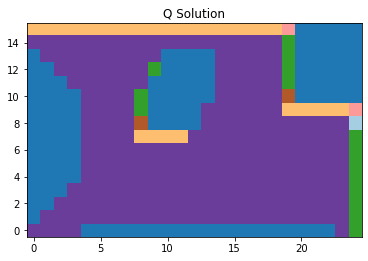

In [427]:
#Cite: maze set up and code from HW2, adjusted to fit current problem
maze3 = np.array([[0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0], 
                 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 
                 [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 
                 [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 
                 [1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                 [1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 
                 [1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 
                 [1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 
                 [1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 
                 [1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 
                 [1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1], 
                 [1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1], 
                 [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1], 
                 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1], 
                 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1], 
                 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1]])

plot_maze2(maze3,mdp.states, 'Q Solution')

Not really, no.  Accorrind to my Q-learning, the optimal policy is to move NE at nearly every state until we are at a wall, and then move towards the goal state.  That doesn't seem right, but I have exhausted the time I have to continue troubleshooting this problem, as I have other classes and finals. Perhaps if we keep moving towards the icy parts, we will be most likely to slip and actually move towards the goal.